In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
import QUANTAXIS as QA
import talib as ta
import datetime #, time

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

In [3]:
# usstock_list = QA.QA_fetch_get_usstock_list('tdx')
# usstock_list.head()

QUANTAXIS>> Selecting the Best Server IP of TDX


USING DEFAULT STOCK IP
USING DEFAULT FUTURE IP


QUANTAXIS>> === The BEST SERVER ===
 stock_ip 60.191.117.167 future_ip 59.175.238.38


,category,market,code,name,desc
code,,,,,
WCN,13,74,WCN,Waste连接,WCN
WCO.CL,13,74,WCO.CL,WCO.CL,WCO.CL
WCST,13,74,WCST,WCST,WCST
WD,13,74,WD,Walker & Dunlop,WD
WDAY,13,74,WDAY,工作日公司,WDAY


In [7]:
# hkstock_list = QA.QA_fetch_get_hkstock_list('tdx')
# hkstock_list.head()

In [2]:
# writer = pd.ExcelWriter("data/code_list.xlsx")
# usstock_list.to_excel(writer, 'us_stock_list', index=False)
# hkstock_list.to_excel(writer, 'hk_stock_list', index=False)
# writer.save()

In [6]:
usstock_list_from_file = pd.read_excel("data/code_list.xlsx", 0, 
                                       dtype={'code':str, 'desc':str})
usstock_list_from_file = usstock_list_from_file.set_index('code')
usstock_list_from_file.head()

,category,market,name,desc
code,,,,
WEAR,13,74,WEAR,WEAR
WEAT,13,74,WEAT信托,WEAT
WEB,13,74,WEB,WEB
WEBK,13,74,韦尔斯利银行,WEBK
WEC,13,74,威斯康辛能源,WEC


In [7]:
hkstock_list_from_file = pd.read_excel("data/code_list.xlsx", 1, 
                                       dtype={'code':str, 'desc':str})
hkstock_list_from_file = hkstock_list_from_file.set_index('code')
hkstock_list_from_file.head()

,category,market,name,desc
code,,,,
08048,2,48,御德国际控股,08048
08049,2,48,吉林长龙药业,08049
08050,2,48,量子思维,08050
08051,2,48,讯智海,08051
08052,2,48,陆庆娱乐,08052


In [22]:
code = 'AMZN'
start = '2010-01-01'
end = '2018-12-18'
# web.


tic = time.perf_counter()
data = QA.QA_fetch_get_usstock_day('tdx', code, start, end)
toc = time.perf_counter()
print(toc-tic)

0.191010100000085


In [19]:
data.tail()

,open,high,low,close,position,trade,price,amount,date,code,date_stamp
date,,,,,,,,,,,
2018-12-12,110.889999,111.269997,109.040001,109.080002,1332504149,357891,0.0,3.966129e+09,2018-12-12,MSFT,1.544544e+09
2018-12-13,109.580002,110.870003,108.629997,109.449997,1330399640,313333,0.0,3.427375e+09,2018-12-13,MSFT,1.544630e+09
2018-12-14,108.250000,109.260002,105.500000,106.029999,1335240426,470431,0.0,5.038265e+09,2018-12-14,MSFT,1.544717e+09
2018-12-17,105.410004,105.800003,101.709999,102.889999,1336906512,569573,0.0,5.891301e+09,2018-12-17,MSFT,1.544976e+09
2018-12-18,103.750000,104.510002,102.519997,103.970001,1335400255,493191,0.0,5.120098e+09,2018-12-18,MSFT,1.545062e+09


In [23]:
# import pandas_datareader.data as web
# import datetime
# import time
# start_time = datetime.datetime.strptime(start, '%Y-%m-%d')
# end_time = datetime.datetime.today()
tic = time.perf_counter()
data_from_web = web.DataReader(code, 'yahoo', start_time, end_time)
toc = time.perf_counter()
print(toc-tic)

1.8865379999999732


In [21]:
data_from_web.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-12,111.269997,109.040001,110.889999,109.080002,36183000.0,109.080002
2018-12-13,110.870003,108.629997,109.580002,109.449997,31333400.0,109.449997
2018-12-14,109.260002,105.500000,108.250000,106.029999,47043100.0,106.029999
2018-12-17,105.800003,101.709999,105.410004,102.889999,56957300.0,102.889999
2018-12-18,104.510002,102.519997,103.750000,103.970001,48231200.0,103.970001


In [24]:
AMZN_close = data_from_web.loc[:, 'Adj Close'][1:]

In [25]:
MSFT_data = web.DataReader('MSFT', 'yahoo', start_time, end_time)

In [26]:
MSFT_close = MSFT_data.loc[:, 'Adj Close'][1:]

In [27]:
ratio = (AMZN_close / MSFT_close).sort_index(ascending=False)

In [28]:
ratio.head()

Date
2018-12-18    14.922381
2018-12-17    14.781903
2018-12-14    15.013770
2018-12-13    15.151942
2018-12-12    15.250642
Name: Adj Close, dtype: float64

In [34]:
ratio.size

2256

In [29]:
tic = time.perf_counter()

position_side = pd.Series()
long_return = pd.Series()
long_short_return = pd.Series()
for i in range(ratio.size):
    if i < ratio.size - 1:
        if ratio[i] > np.mean(ratio[i+1:]):
            position_side[ratio.index[i]] = 1
        elif ratio[i] < np.mean(ratio[i+1:]):
            position_side[ratio.index[i]] = -1
        else:
            position_side[ratio.index[i]] = 0
    else:
        position_side[ratio.index[i]] = np.nan
toc = time.perf_counter()
print(toc - tic)

3.442617499999983


In [45]:
tic = time.perf_counter()

position_side_list = []
for i in range(ratio.size):
    if i < ratio.size - 1:
        if ratio[i] > np.mean(ratio[i+1:]):
            position_side_list.append(1)
        elif ratio[i] < np.mean(ratio[i+1:]):
            position_side_list.append(-1)
        else:
            position_side_list.append(0)
    else:
        position_side_list.append(np.nan)
position_side = pd.Series(position_side_list, index=ratio.index)
toc = time.perf_counter()
print(toc - tic)

0.609303600000203


In [46]:
position_side

Date
2018-12-18    1.0
2018-12-17    1.0
2018-12-14    1.0
2018-12-13    1.0
2018-12-12    1.0
2018-12-11    1.0
2018-12-10    1.0
2018-12-07    1.0
2018-12-06    1.0
2018-12-04    1.0
2018-12-03    1.0
2018-11-30    1.0
2018-11-29    1.0
2018-11-28    1.0
2018-11-27    1.0
2018-11-26    1.0
2018-11-23    1.0
2018-11-21    1.0
2018-11-20    1.0
2018-11-19    1.0
2018-11-16    1.0
2018-11-15    1.0
2018-11-14    1.0
2018-11-13    1.0
2018-11-12    1.0
2018-11-09    1.0
2018-11-08    1.0
2018-11-07    1.0
2018-11-06    1.0
2018-11-05    1.0
             ... 
2010-02-16   -1.0
2010-02-12    1.0
2010-02-11    1.0
2010-02-10   -1.0
2010-02-09   -1.0
2010-02-08   -1.0
2010-02-05   -1.0
2010-02-04   -1.0
2010-02-03   -1.0
2010-02-02   -1.0
2010-02-01   -1.0
2010-01-29    1.0
2010-01-28    1.0
2010-01-27   -1.0
2010-01-26   -1.0
2010-01-25   -1.0
2010-01-22   -1.0
2010-01-21   -1.0
2010-01-20   -1.0
2010-01-19   -1.0
2010-01-15   -1.0
2010-01-14   -1.0
2010-01-13   -1.0
2010-01-12   -1.0
2010-

In [47]:
ratio

Date
2018-12-18    14.922381
2018-12-17    14.781903
2018-12-14    15.013770
2018-12-13    15.151942
2018-12-12    15.250642
2018-12-11    15.132517
2018-12-10    15.252627
2018-12-07    15.542168
2018-12-06    15.561772
2018-12-04    15.374125
2018-12-03    15.811937
2018-11-30    15.241862
2018-11-29    15.188038
2018-11-28    15.098542
2018-11-27    14.760314
2018-11-26    14.852352
2018-11-23    14.573203
2018-11-21    14.709824
2018-11-20    14.703175
2018-11-19    14.455076
2018-11-16    14.714286
2018-11-15    15.095451
2018-11-14    15.233019
2018-11-13    15.319027
2018-11-12    15.382439
2018-11-09    15.696157
2018-11-08    15.771735
2018-11-07    15.747355
2018-11-06    15.316627
2018-11-05    15.206328
                ...    
2010-02-16     5.166131
2010-02-12     5.363817
2010-02-11     5.346718
2010-02-10     5.249443
2010-02-09     5.275640
2010-02-08     5.276636
2010-02-05     5.245161
2010-02-04     5.213867
2010-02-03     5.208184
2010-02-02     5.196184
2010-02-01 

In [68]:
AMZN_pct.head()

Date
2018-12-18   -0.044601
2018-12-17   -0.040081
2018-12-14   -0.003102
2018-12-13    0.012354
2018-12-12    0.001347
Name: Adj Close, dtype: float64

In [71]:
AMZN_pct = AMZN_close.pct_change().sort_index(ascending=False).shift(-1)
MSFT_pct = MSFT_close.pct_change().sort_index(ascending=False).shift(-1)

In [74]:
(AMZN_pct * (1+position_side)/2 + MSFT_pct * (1-position_side)/2).mean()

0.0024362820758406416

In [65]:
rolling_ratio = ratio.sort_index(ascending=True).\
rolling(14).mean().shift(1).sort_index(ascending=False)

In [73]:
position_side = (ratio > rolling_ratio).apply(int)

In [43]:
AMZN_close.sort_index(ascending=False).head()

Date
2018-12-18    1551.479980
2018-12-17    1520.910034
2018-12-14    1591.910034
2018-12-13    1658.380005
2018-12-12    1663.540039
Name: Adj Close, dtype: float64

In [36]:
position_side.value_counts()

long     1963
short     292
0           1
dtype: int64

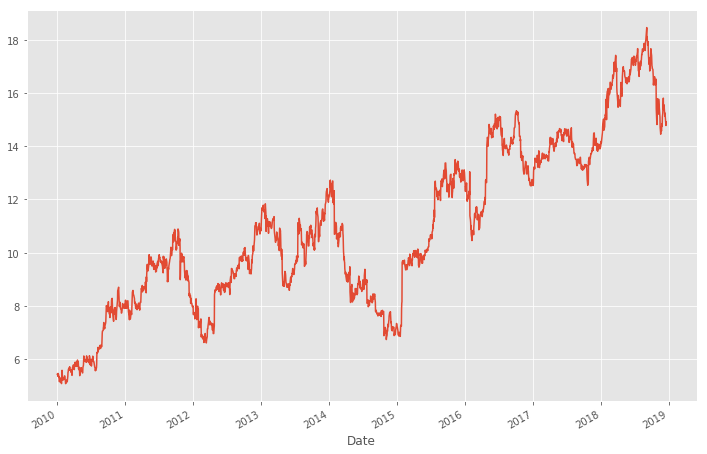

In [37]:
ratio.plot();

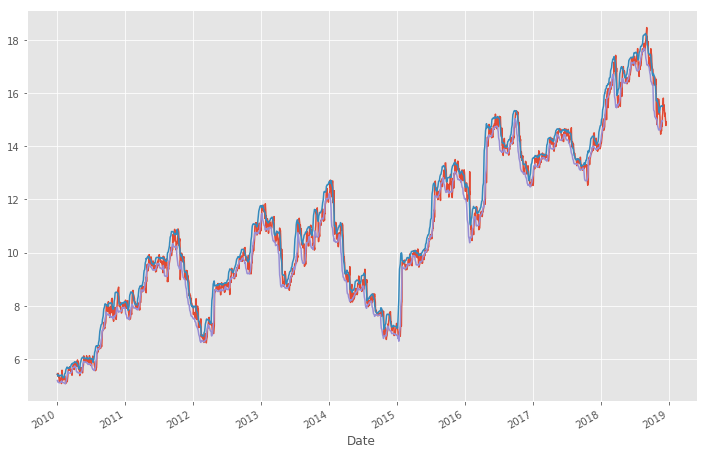

In [38]:
ratio_rolling_mean = ratio.rolling(14).mean()
ratio_rolling_std = ratio.rolling(14).std()
upper_line = ratio_rolling_mean + ratio_rolling_std
lower_line = ratio_rolling_mean - ratio_rolling_std

ratio[-100:].plot();
upper_line[-100:].plot();
lower_line[-100:].plot();

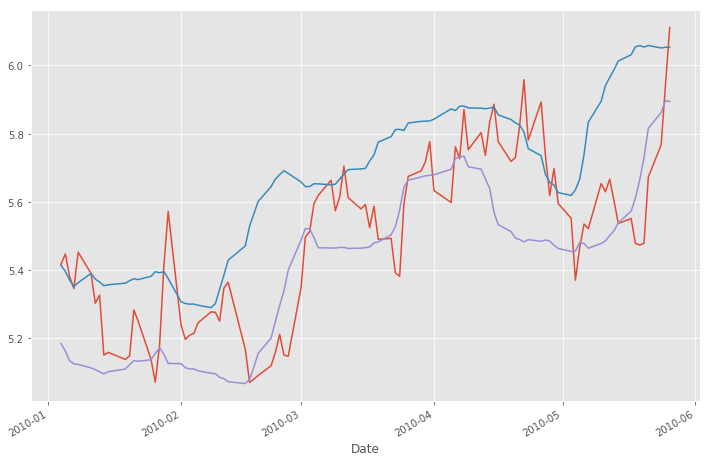

In [39]:
ratio[-100:].plot();
upper_line[-100:].plot();
lower_line[-100:].plot();